In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ocr_xml = '/content/drive/MyDrive/OCR/ImageAndXML_Data/0000223278_ocr.xml'

In [ ]:
from lxml import etree, objectify

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse(ocr_xml)
root = tree.getroot()

#This file contains xml name space which come attached with each tag, 
#xmlns makes it difficult for a reader to focus on desired tag, so we remove the namespaces
for elem in root.getiterator():
    if not hasattr(elem.tag, 'find'): continue  
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(root, cleanup_namespaces=True)

In [ ]:
bbs_and_lines = []
for element in root.iter('TextLine'):
    bb = ''
    coords = element.find('Coords')
    bb = coords.get('points')
    # print(bb)
    line = ''
    for Word in element.iter('Word'):
        TextEquiv = Word.find('TextEquiv')
        Unicode = TextEquiv.find('Unicode')
        line = line + Unicode.text + ' '
    # print(line)

    bb_and_line = {'bb': bb, 'line' : line}
    bbs_and_lines.append(bb_and_line)


In [ ]:
print(bbs_and_lines)
text = ''
for bb_and_line in bbs_and_lines:
    text = text + bb_and_line['line']
print(text)
len(bbs_and_lines)

[{'bb': '247,26 275,26 275,49 247,49', 'line': 'r> '}, {'bb': '158,77 471,77 471,93 158,93', 'line': 'B AT (U.K. and EXPORT) limited '}, {'bb': '158,110 471,110 471,121 158,121', 'line': 'Export House Woking Surrey GU211YB England '}, {'bb': '112,154 395,154 395,164 112,164', 'line': 'Brown & Williamson International Tobacco, '}, {'bb': '112,168 290,168 290,178 112,178', 'line': '3000 First National Tower, '}, {'bb': '112,183 269,183 269,193 112,193', 'line': '101 South Fifth Street, '}, {'bb': '111,195 297,195 297,207 111,207', 'line': 'Louisville, Kentucky 40202, '}, {'bb': '112,211 150,211 150,219 112,219', 'line': 'U.S.A. '}, {'bb': '111,233 313,233 313,243 111,243', 'line': 'Attention Mr. Gory Xhirschncr '}, {'bb': '405,147 517,147 517,156 405,156', 'line': 'Telephone Wokin* 76111 '}, {'bb': '405,159 572,159 572,169 405,169', 'line': 'Telaeriphic Addreee Export Wokir.* '}, {'bb': '405,171 460,171 460,178 405,178', 'line': 'Telex &M101 '}, {'bb': '405,181 517,181 517,190 405,190', 

24

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

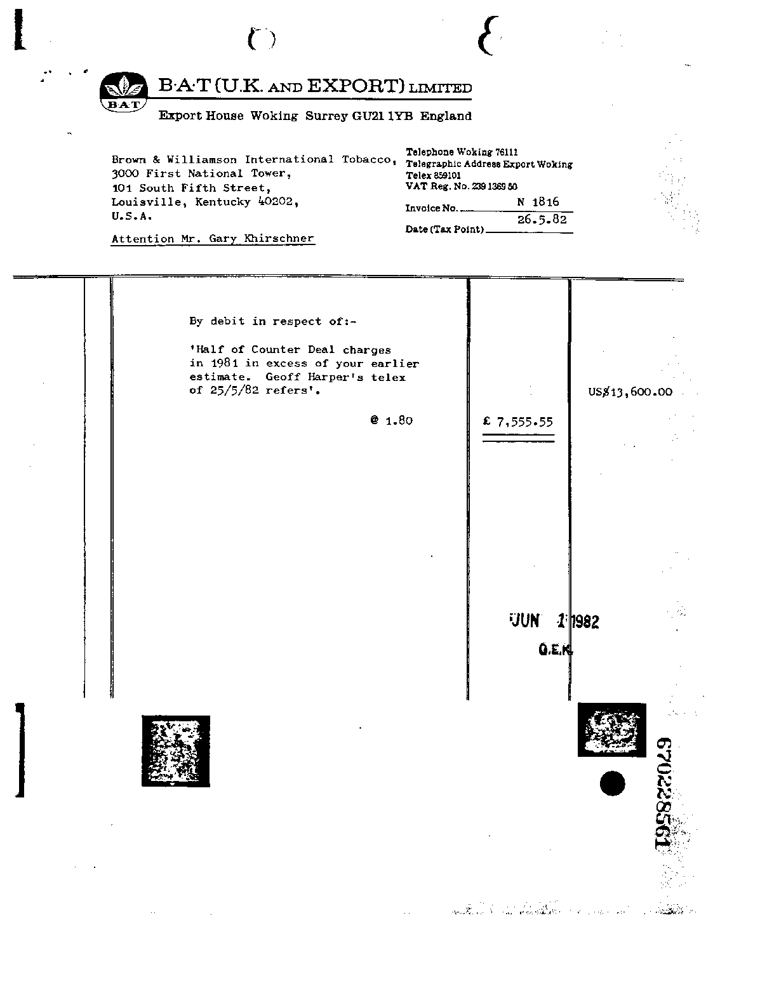

In [ ]:
image = cv2.imread('/content/drive/MyDrive/OCR/ImageAndXML_Data/0000223278.tif')
cv2_imshow(image)

['158', '77 471', '77 471', '93 158', '93']
158 77 471 93


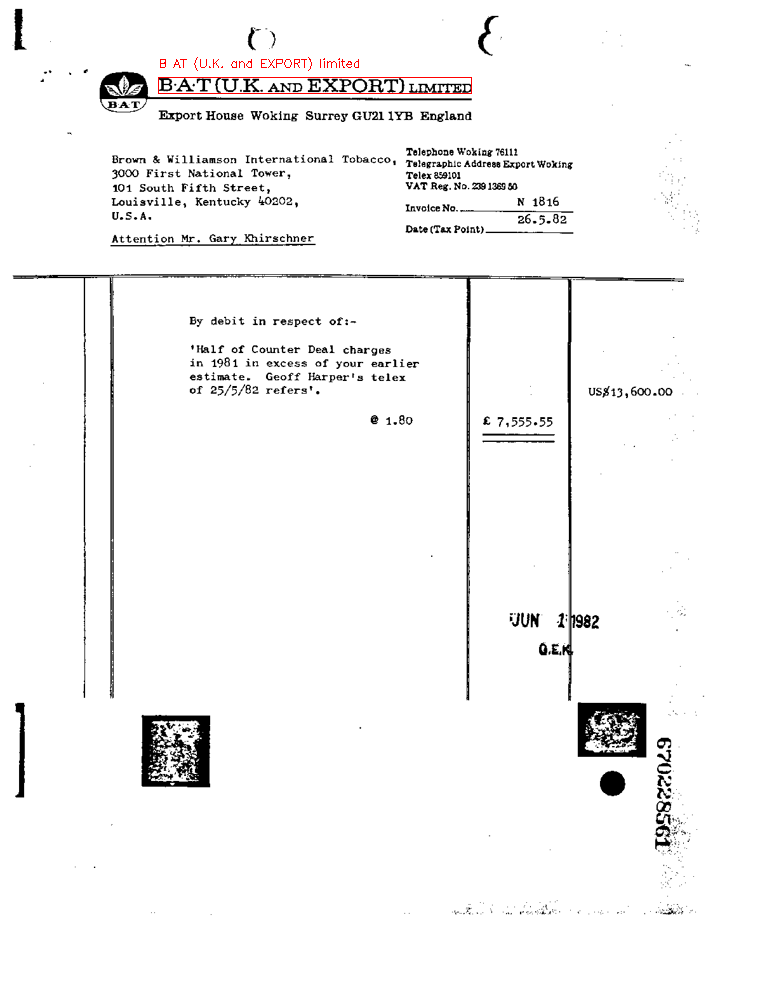

In [ ]:
bb = bbs_and_lines[1]['bb'].split(',')
print(bb)
x1 = int(float(bb[0]))
y1 = int(float(bb[1].split(" ")[0]))
x2 = int(float(bb[1].split(" ")[1]))
y2 = int(float(bb[-1]))
print(x1, y1, x2, y2)
image = cv2.imread('/content/drive/MyDrive/OCR/ImageAndXML_Data/0000223278.tif')
image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
image = cv2.putText(image, bbs_and_lines[1]['line'], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
cv2_imshow(image)

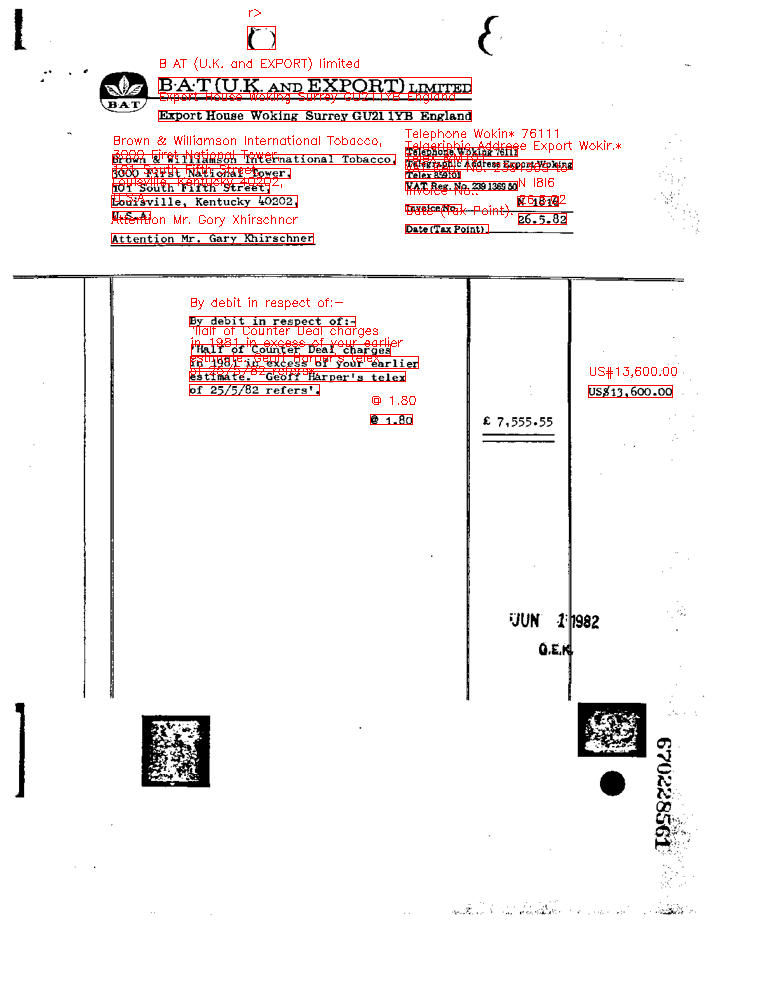

In [ ]:
image = cv2.imread('/content/drive/MyDrive/OCR/ImageAndXML_Data/0000223278.tif')
for bb_and_line in bbs_and_lines:
    bb = bb_and_line['bb'].split(',')
    x1 = int(float(bb[0]))
    y1 = int(float(bb[1].split(" ")[0]))
    x2 = int(float(bb[1].split(" ")[1]))
    y2 = int(float(bb[-1]))
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    image = cv2.putText(image, bb_and_line['line'], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
cv2_imshow(image)

In [ ]:
from pathlib import Path
import pandas as pd
import os

dir = '/content/drive/MyDrive/OCR/ImageAndXML_Data/'

In [ ]:
def get_ocr_data(filename):
    ocr_xml = dir + filename + '_ocr.xml'
    parser = etree.XMLParser(remove_blank_text=True)
    tree = etree.parse(ocr_xml)
    root = tree.getroot()

    #This file contains xml name space which come attached with each tag, 
    #xmlns makes it difficult for a reader to focus on desired tag, so we remove the namespaces
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue  
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    
    bbs_and_lines = []
    for element in root.iter('TextLine'):
        bb = ''
        coords = element.find('Coords')
        bb = coords.get('points')
        bb = bb.split(',')
        x1 = int(float(bb[0]))
        y1 = int(float(bb[1].split(" ")[0]))
        x2 = int(float(bb[1].split(" ")[1]))
        y2 = int(float(bb[-1]))
        bb = str(x1) + ' ' + str(y1) + ' ' + str(x2) + ' ' + str(y2)
        # print(bb)
        line = ''
        for Word in element.iter('Word'):
            TextEquiv = Word.find('TextEquiv')
            Unicode = TextEquiv.find('Unicode')
            line = line + Unicode.text + ' '
        # print(line)

        bb_and_line = {'bb': bb, 'line' : line}
        bbs_and_lines.append(bb_and_line)
    return bbs_and_lines

In [ ]:
paths = Path(dir).glob('**/*.tif',)
for tif_path in paths:
    print(Path(tif_path).stem)
    filename = Path(tif_path).stem
    
    # Get OCR Data 
    bbs_and_lines = get_ocr_data(filename)
    # print(bbs_and_lines)

    # Get Text
    all_text = ''
    for bb_and_line in bbs_and_lines:
        all_text = all_text + bb_and_line['line']
    with open( dir + filename + '.txt', 'w') as f:
        f.write(all_text)
    # print(all_text)

    # Get CSV
    df = pd.DataFrame(columns=['image_no', 'text', 'bb'])
    for i, bb_and_line in enumerate(bbs_and_lines):
        image_no = filename + '_' + str(i) + '.tif'
        text = bb_and_line['line']
        bb = bb_and_line['bb']
        
        new_dict = {
            'image_no' : image_no, 
            'text': text,
            'bb' : bb
        }
        df = df.append(new_dict, ignore_index=True)
    # print(df.head())
    df.to_csv(dir + filename + '.csv')

    # Get Image Line
    image_path = dir + filename
    try: 
        os.mkdir(image_path) 
    except OSError as error: 
        print(error)
    image = cv2.imread(image_path+'.tif')
    original = image.copy()
    for i, bb_and_line in enumerate(bbs_and_lines):
        bb =  bb_and_line['bb'].split(' ')
        x1 = int(bb[0])
        y1 = int(bb[1])
        x2 = int(bb[2])
        y2 = int(bb[3])
        ROI = original[y1:y2, x1:x2]
        cv2.imwrite(image_path + '/' + filename + '_{}.tif'.format(i), ROI)


2063209074_9077
[Errno 17] File exists: '/content/drive/MyDrive/OCR/ImageAndXML_Data/2063209074_9077'
2063207059_7062
[Errno 17] File exists: '/content/drive/MyDrive/OCR/ImageAndXML_Data/2063207059_7062'
2056446070
[Errno 17] File exists: '/content/drive/MyDrive/OCR/ImageAndXML_Data/2056446070'
2061828225
2063162659
2063113779
2063250015
2063576888
2063590390
2063216131
2063322469
2063235029
2063233533
2063249953
2063576893
2063319693
2063216033
2063650388
2063846615
2063610122
2063610040
2063611385
2063610172
2063610071
2063610103
2064339433
2065238574
2065216982
2065364917
2065239368
2064978624
2064225959
2064345524
2065466615
2070238500
2071217600
2071217429
2071021272
2070425084
2070750524
2071382979
2070584510
2070425058
2070424009
2071386322
2071217430
2070424201
2071413111
2073684118
2071557502
2072957946
2072484071
2073883150
2071413187
2072957830
2073684342
2072957848
2073684235
2072860354
2077000123
2080272310
2074484114
2080705096
2073883308
2074417069
2077000168_0169
207388

OSError: ignored